# Title

Group member: Hannah Martin 69082071

## Introduction

In [10]:
install.packages("tidymodels")

also installing the dependencies ‘globals’, ‘parallelly’, ‘tzdb’, ‘cpp11’, ‘future’, ‘warp’, ‘lhs’, ‘memoise’, ‘DiceDesign’, ‘vctrs’, ‘scales’, ‘withr’, ‘glue’, ‘generics’, ‘clock’, ‘lifecycle’, ‘tidyselect’, ‘furrr’, ‘slider’, ‘pillar’, ‘GPfit’, ‘broom’, ‘cli’, ‘conflicted’, ‘dials’, ‘dplyr’, ‘ggplot2’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rlang’, ‘rsample’, ‘tibble’, ‘tidyr’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [16]:
install.packages("rlang")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Preliminary Results

In [1]:
# Load package
library(tidyverse)
library(repr)
library(readxl)
library(infer)
library(cowplot)
library(GGally)
library(broom)
library(tidymodels)

# Set seed
set.seed(123)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   2.0.2      ✔ forcats 0.5.1 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ dials        1.1.0     ✔ tune         1.0.1
✔ modeldata    1.0.1     ✔ workflows    1.1.0
✔ parsnip      1.0.2     ✔ workflowsets 1.0.0
✔ recipes      1.0.3     ✔ yardstick    1.1.0
✔ rsample      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      mas

#### 1. Load Data

In [2]:
# Read the life expectancy data and name it as "life_exp"
life_exp <- read_csv("https://shorturl.at/FV478")
head(life_exp)

# Compute number of rows
number_rows <- life_exp %>%
               nrow()
number_rows

Rows: 2938 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, Status
dbl (20): Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, pe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country     Year Status     Life expectancy Adult Mortality infant deaths
1 Afghanistan 2015 Developing 65.0            263             62           
2 Afghanistan 2014 Developing 59.9            271             64           
3 Afghanistan 2013 Developing 59.9            268             66           
4 Afghanistan 2012 Developing 59.5            272             69           
5 Afghanistan 2011 Developing 59.2            275             71           
6 Afghanistan 2010 Developing 58.8            279             74           
  Alcohol percentage expenditure Hepatitis B Measles ⋯ Polio Total expenditure
1 0.01    71.279624              65          1154    ⋯  6    8.16             
2 0.01    73.523582              62           492    ⋯ 58    8.18             
3 0.01    73.219243              64           430    ⋯ 62    8.13             
4 0.01    78.184215              67          2787    ⋯ 67    8.52             
5 0.01     7.097109              68          3013    ⋯ 68    7.87             
6 0.01    79.679367              66          1989    ⋯ 66    9.20             
  Diphtheria HIV/AIDS GDP       Population thinness  1-19 years
1 65         0.1      584.25921 33736494   17.2                
2 62         0.1      612.69651   327582   17.5                
3 64         0.1      631.74498 31731688   17.7                
4 67         0.1      669.95900  3696958   17.9                
5 68         0.1       63.53723  2978599   18.2                
6 66         0.1      553.32894  2883167   18.4                
  thinness 5-9 years Income composition of resources Schooling
1 17.3               0.479                           10.1     
2 17.5               0.476                           10.0     
3 17.7               0.470                            9.9     
4 18.0               0.463                            9.8     
5 18.2               0.454                            9.5     
6 18.4               0.448                            9.2

[1] 2938

#### 2. Clean and Wrangle Data

In [3]:
# Convert "country" and "status" variables to factor
life_exp <- life_exp %>%
           mutate(Country = as.factor(Country)) %>% 
            mutate(Status = as.factor(Status))

# Remove NAs
life_exp <- life_exp %>%
            na.omit(life_exp)
head(life_exp)

# Compute number of rows
number_rows_cleaned <- life_exp %>%
                        nrow()

number_rows_cleaned

Country     Year Status     Life expectancy Adult Mortality infant deaths
1 Afghanistan 2015 Developing 65.0            263             62           
2 Afghanistan 2014 Developing 59.9            271             64           
3 Afghanistan 2013 Developing 59.9            268             66           
4 Afghanistan 2012 Developing 59.5            272             69           
5 Afghanistan 2011 Developing 59.2            275             71           
6 Afghanistan 2010 Developing 58.8            279             74           
  Alcohol percentage expenditure Hepatitis B Measles ⋯ Polio Total expenditure
1 0.01    71.279624              65          1154    ⋯  6    8.16             
2 0.01    73.523582              62           492    ⋯ 58    8.18             
3 0.01    73.219243              64           430    ⋯ 62    8.13             
4 0.01    78.184215              67          2787    ⋯ 67    8.52             
5 0.01     7.097109              68          3013    ⋯ 68    7.87             
6 0.01    79.679367              66          1989    ⋯ 66    9.20             
  Diphtheria HIV/AIDS GDP       Population thinness  1-19 years
1 65         0.1      584.25921 33736494   17.2                
2 62         0.1      612.69651   327582   17.5                
3 64         0.1      631.74498 31731688   17.7                
4 67         0.1      669.95900  3696958   17.9                
5 68         0.1       63.53723  2978599   18.2                
6 66         0.1      553.32894  2883167   18.4                
  thinness 5-9 years Income composition of resources Schooling
1 17.3               0.479                           10.1     
2 17.5               0.476                           10.0     
3 17.7               0.470                            9.9     
4 18.0               0.463                            9.8     
5 18.2               0.454                            9.5     
6 18.4               0.448                            9.2

[1] 1649

In [4]:
# rename response variable to standard naming convention

colnames(life_exp)[colnames(life_exp)== "Life expectancy"] <- "life_expectancy"
colnames(life_exp)[colnames(life_exp)== "thinness  1-19 years"] <- "thin_1_19"
colnames(life_exp)[colnames(life_exp)== "thinness 5-9 years"] <- "thin_5_9"    
colnames(life_exp)[colnames(life_exp)== "HIV/AIDS"] <- "hiv_aids"
colnames(life_exp)[colnames(life_exp)== "Income composition of resources"] <- "income_comp_resources"

# split into test / train datasets

df_split <- initial_split(life_exp, prop=0.8, strata= life_expectancy)

df_train <- training(df_split)
df_test <- testing(df_split)

#### 3. Statistics of Data

In [52]:
summary(df_train)

        Country    
 Fiji       :  15  
 Zimbabwe   :  15  
 Afghanistan:  14  
 Albania    :  14  
 Bhutan     :  14  
 Brazil     :  14  
 (Other)    :1232  
      Year     
 Min.   :2000  
 1st Qu.:2004  
 Median :2008  
 Mean   :2008  
 3rd Qu.:2011  
 Max.   :2015  
               
        Status    
 Developed : 188  
 Developing:1130  
                  
                  
                  
                  
                  
 life_expectancy
 Min.   :44.00  
 1st Qu.:64.40  
 Median :71.70  
 Mean   :69.21  
 3rd Qu.:74.90  
 Max.   :89.00  
                
 Adult Mortality
 Min.   :  1.0  
 1st Qu.: 76.0  
 Median :148.0  
 Mean   :167.9  
 3rd Qu.:225.0  
 Max.   :723.0  
                
 infant deaths    
 Min.   :   0.00  
 1st Qu.:   1.00  
 Median :   3.00  
 Mean   :  33.03  
 3rd Qu.:  22.00  
 Max.   :1600.00  
                  
    Alcohol       
 Min.   : 0.0100  
 1st Qu.: 0.7225  
 Median : 3.7550  
 Mean   : 4.5081  
 3rd Qu.: 7.3175  
 Max.   :17.8700  
   

#### 4. Data Visualization

In [8]:

library(corrplot)

corrplot 0.92 loaded



In [57]:
options(repr.plot.width = 60, repr.plot.height = 60)

relationship_plot <- df_train %>% select(-Country) %>%
ggpairs(upper=list(continuous = wrap("cor", size=9)))

relationship_plot 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

In [6]:
#options(repr.plot.width = 30, repr.plot.height = 30)

  
df_train_num <- df_train %>% select(-Country, -Status)

cor_table <- cor(df_train_num)
cor_table

Year        life_expectancy Adult Mortality
Year                    1.00000000  0.06003249     -0.05410148    
life_expectancy         0.06003249  1.00000000     -0.69283002    
Adult Mortality        -0.05410148 -0.69283002      1.00000000    
infant deaths           0.02199467 -0.16693756      0.02682175    
Alcohol                -0.10860065  0.40750110     -0.17301865    
percentage expenditure  0.06963606  0.40127549     -0.22911484    
Hepatitis B             0.09873302  0.20800276     -0.10288812    
Measles                -0.03896767 -0.05650492     -0.03198533    
BMI                     0.01230121  0.53818449     -0.34176741    
under-five deaths       0.02444932 -0.18936989      0.04359685    
Polio                  -0.01977786  0.31516613     -0.17443134    
Total expenditure       0.04822623  0.17319966     -0.07594931    
Diphtheria              0.01450304  0.33649489     -0.18802423    
hiv_aids               -0.13287451 -0.59481959      0.55666675    
GDP                     0.10062422  0.42871576     -0.24547156    
Population              0.02413702 -0.02275181     -0.02113676    
thin_1_19               0.02040255 -0.43966182      0.25069370    
thin_5_9                0.02106129 -0.43640142      0.26130205    
income_comp_resources   0.12758143  0.71723508     -0.43551299    
Schooling               0.09037000  0.71938687     -0.40536093    
                       infant deaths Alcohol     percentage expenditure
Year                    0.021994674  -0.10860065  0.06963606           
life_expectancy        -0.166937559   0.40750110  0.40127549           
Adult Mortality         0.026821750  -0.17301865 -0.22911484           
infant deaths           1.000000000  -0.10139648 -0.08712281           
Alcohol                -0.101396479   1.00000000  0.42663538           
percentage expenditure -0.087122808   0.42663538  1.00000000           
Hepatitis B            -0.233788191   0.12516510  0.02439479           
Measles                 0.566367653  -0.04363329 -0.06103963           
BMI                    -0.224626802   0.36203325  0.21848619           
under-five deaths       0.996942399  -0.09650578 -0.08842381           
Polio                  -0.153793368   0.24178734  0.12041888           
Total expenditure      -0.145783277   0.22223102  0.19319550           
Diphtheria             -0.164214585   0.24127096  0.13147012           
hiv_aids                0.003965265  -0.02854031 -0.09256421           
GDP                    -0.092119232   0.44513229  0.95839052           
Population              0.654136322  -0.01999789 -0.01716638           
thin_1_19               0.485056152  -0.40362814 -0.24879197           
thin_5_9                0.476662259  -0.38413808 -0.24736488           
income_comp_resources  -0.133444111   0.57100786  0.39362035           
Schooling              -0.209963523   0.62549751  0.40328605           
                       Hepatitis B Measles     BMI         under-five deaths
Year                    0.09873302 -0.03896767  0.01230121  0.02444932      
life_expectancy         0.20800276 -0.05650492  0.53818449 -0.18936989      
Adult Mortality        -0.10288812 -0.03198533 -0.34176741  0.04359685      
infant deaths          -0.23378819  0.56636765 -0.22462680  0.99694240      
Alcohol                 0.12516510 -0.04363329  0.36203325 -0.09650578      
percentage expenditure  0.02439479 -0.06103963  0.21848619 -0.08842381      
Hepatitis B             1.00000000 -0.13112662  0.15145543 -0.24258127      
Measles                -0.13112662  1.00000000 -0.14012749  0.55237967      
BMI                     0.15145543 -0.14012749  1.00000000 -0.23220908      
under-five deaths      -0.24258127  0.55237967 -0.23220908  1.00000000      
Polio                   0.49167259 -0.05961291  0.17835737 -0.16839250      
Total expenditure       0.11308820 -0.10036266  0.18762180 -0.14549900      
Diphtheria              0.58141139 -0.06126146  0.18141750 -0.18093313      
hiv_aids               -0.

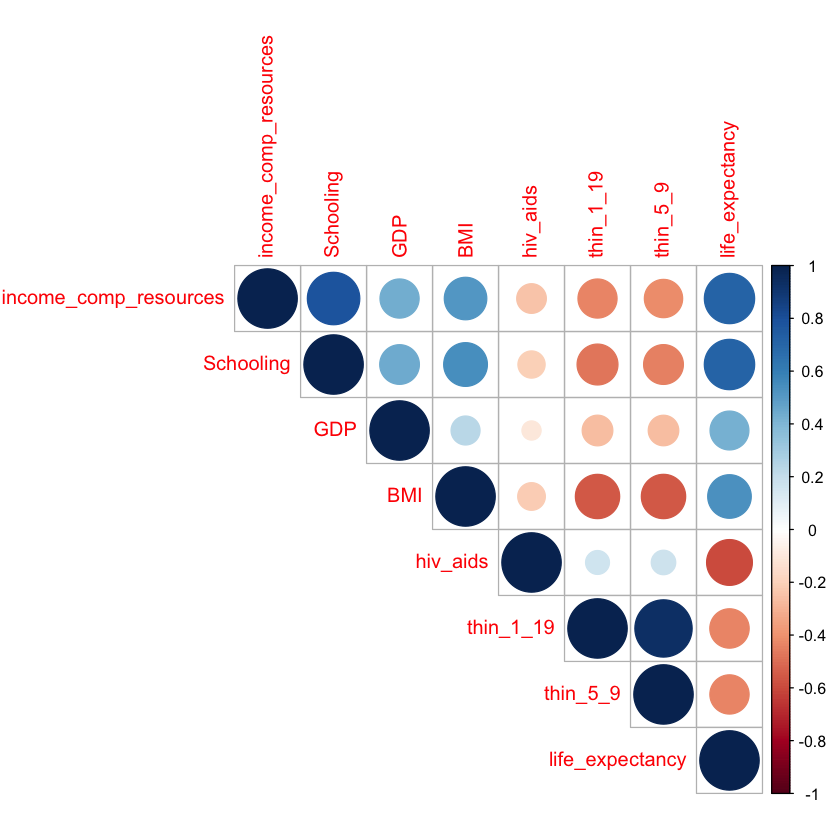

In [12]:
df_high_corr <- df_train %>% select(income_comp_resources, Schooling, GDP, BMI, hiv_aids, thin_1_19, thin_5_9, life_expectancy)

df_high_corr_plot <- corrplot(cor(df_high_corr), type="upper") # correlation plot of variables highly correlated with life exp

Above displays the correlation plot of variables with correlation to life expectancy greater than 4.2

In [29]:

df_high_corr_status <- df_train %>% select(Status, income_comp_resources, Schooling, GDP, BMI, hiv_aids, thin_1_19, thin_5_9, life_expectancy)

df_high_corr_dev <- df_high_corr_status %>% filter(Status == "Developed")
df_high_corr_undev <- df_high_corr_status %>% filter(Status == "Developing")

df_high_corr_dev <- df_high_corr_dev %>% select(-Status)
df_high_corr_undev <- df_high_corr_undev %>% select(-Status)

life_exp_developed <- cor(df_high_corr_dev)[,8] # correlation developed countries variables highly correlated with life exp
as.data.frame(life_exp_developed)





Warning message in cor(df_high_corr_dev):
“the standard deviation is zero”


life_exp_developed
income_comp_resources  0.710872307      
Schooling              0.326733670      
GDP                    0.379554974      
BMI                    0.001955826      
hiv_aids                        NA      
thin_1_19             -0.721853108      
thin_5_9              -0.701826425      
life_expectancy        1.000000000

In [30]:
life_exp_developing <- cor(df_high_corr_undev)[,8] # correlation developing countries variables highly correlated with life exp
as.data.frame(life_exp_developing)

life_exp_developing
income_comp_resources  0.6437323         
Schooling              0.6607560         
GDP                    0.3981892         
BMI                    0.5185304         
hiv_aids              -0.6198954         
thin_1_19             -0.3538158         
thin_5_9              -0.3507354         
life_expectancy        1.0000000

### Visualizing relation between 2 predictors with the highest correlation with life expectancy:

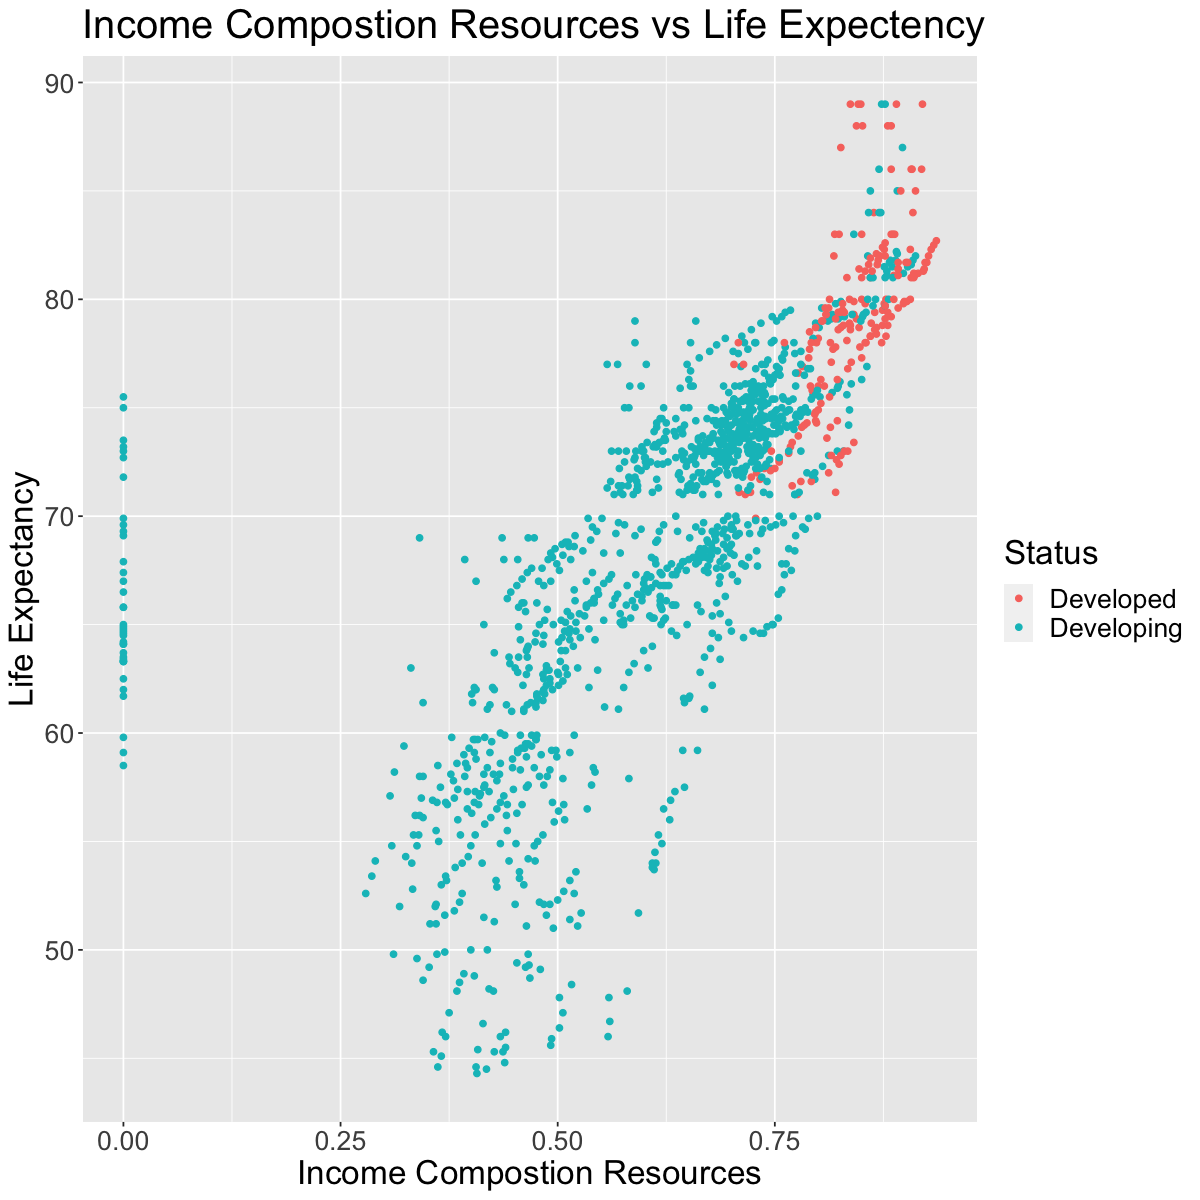

In [73]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df_train, aes(x = income_comp_resources, y = life_expectancy)) +
    geom_point(aes(color = Status)) +
    xlab("Income Compostion Resources")+
    ylab("Life Expectancy")+
    ggtitle("Income Compostion Resources vs Life Expectency")+
    theme(text = element_text(size=20))

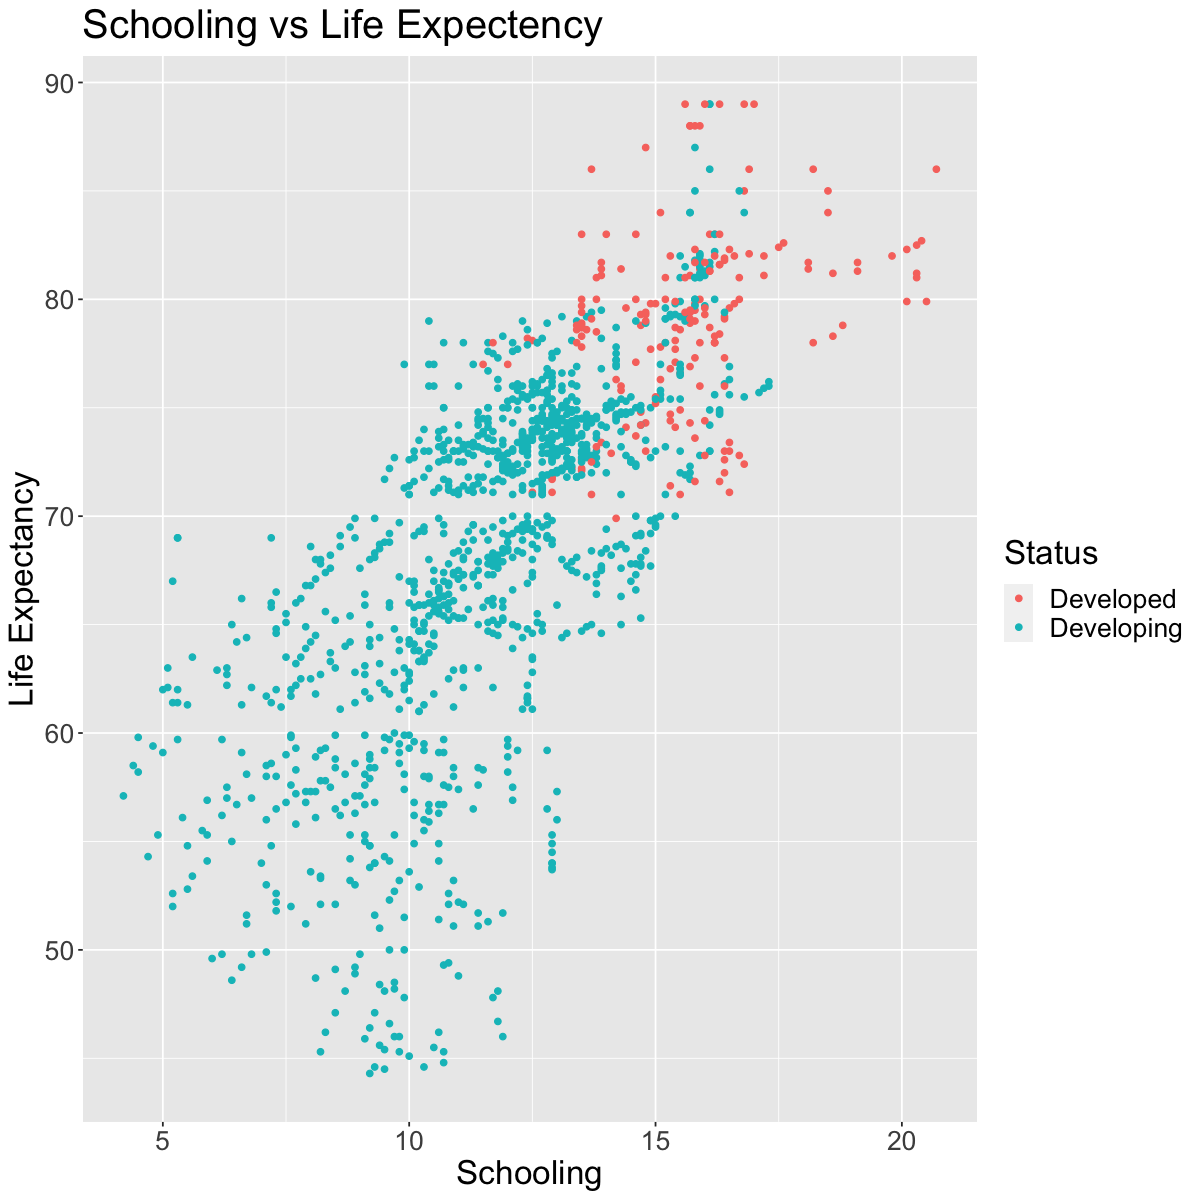

In [74]:
ggplot(df_train, aes(x = Schooling, y = life_expectancy)) +
    geom_point(aes(color = Status)) +
    xlab("Schooling")+
    ylab("Life Expectancy")+
    ggtitle("Schooling vs Life Expectency")+
    theme(text = element_text(size=20))

It appears the best two predictors for life expectancy will be schooling and income composition resources.

## Methods: Plan

## References